In [ ]:
import pandas as pd
import scipy as sp
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv("/content/drive/MyDrive/CSE 256 Project/XAI/data/medical_tc_train_cleaned.csv")
test =  pd.read_csv("/content/drive/MyDrive/CSE 256 Project/XAI/data/medical_tc_test_cleaned.csv")
labels = pd.read_csv("/content/drive/MyDrive/CSE 256 Project/XAI/data/medical_tc_labels.csv")

In [ ]:
testData = pd.DataFrame({'medical_abstract': test['medical_abstract'], 'condition_label': test['condition_label']})
testData.head()

,medical_abstract,condition_label
0,obstructive sleep apnea following topical orop...,non-cardiovascular
1,neutrophil function and pyogenic infections bo...,non-cardiovascular
2,phase ii study combined methotrexate and tenip...,non-cardiovascular
3,flow cytometric dna analysis parathyroid tumor...,non-cardiovascular
4,paraneoplastic vasculitic neuropathy treatable...,cardiovascular


In [ ]:
sentence_lengths = []
for sentence in testData['medical_abstract']:
  sentence_lengths.append(len(sentence))

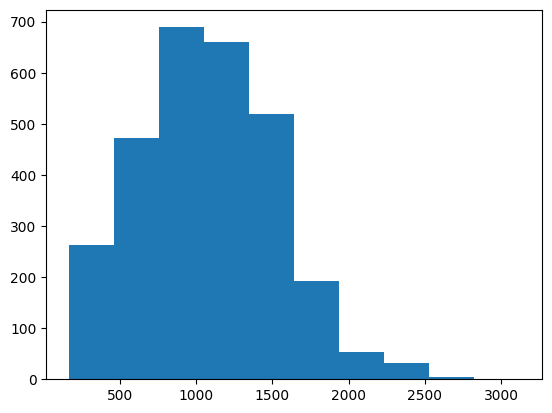

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sentence_lengths)
plt.show()

In [ ]:
shortTestData = testData[testData['medical_abstract'].str.len() < 300]
shortTestData.head()

,medical_abstract,condition_label
61,ptca gastroepiploic bypass technique percutane...,non-cardiovascular
75,catheterization coronary artery bypass graft f...,non-cardiovascular
100,gastroesophageal reflux infants clinically sig...,non-cardiovascular
110,sudden death from acute cocaine intoxication v...,non-cardiovascular
119,case unilateral posterior ischemic optic neuro...,cardiovascular


In [ ]:
print(len(shortTestData))

56


In [ ]:
print(len(shortTestData[shortTestData['condition_label'] == 'cardiovascular']))

13


In [ ]:
print(len(shortTestData[shortTestData['condition_label'] == 'non-cardiovascular']))

43


In [ ]:
for index, example in shortTestData[shortTestData['condition_label'] == 'cardiovascular'].iterrows():
  print(example['medical_abstract'])
  print('\n\n')

case unilateral posterior ischemic optic neuropathy after radical neck dissection we present case unilateral posterior ischemic optic neuropathy after bilateral radical neck dissection etiologic factors discussed



lipomatous hypertrophy interatrial septum unusual intraoperative finding lipomatous hypertrophy interatrial septum incidental finding man 45 undergoing coronary artery bypass grafting unstable angina he not overweight and did not have any rhythm disturbances diagnosis made frozen section



atheroemboli lower urinary tract marker atherosclerotic vascular diseasea case report atheroemboli lower genitourinary tract may serve as marker disseminated atheroembolic disease highly lethal condition case presentation and review our institional experience presented



hydatid cyst interatrial and interventricular septum heart our knowledge this report describes first case large hydatid cyst involving full thickness both interatrial and interventricular septum heart which detected at 

In [ ]:
for index, example in shortTestData[shortTestData['condition_label'] == 'non-cardiovascular'].iterrows():
  print(example['medical_abstract'])
  print('\n\n')

ptca gastroepiploic bypass technique percutaneous transluminal coronary angioplasty ptca gastroepiploic bypass described using standard ptca devices severe spasm gastroepiploic bypass occurred modification guide catheter position suggested avoid inducing gastroepiploic bypass spasm



catheterization coronary artery bypass graft from descending aorta increasing frequency reoperation coronary artery disease has led use variety grafts this report describes catheter technique selective opacification saphenous vein graft from descending thoracic aorta posterior coronary circulation



gastroesophageal reflux infants clinically significant gastroesophageal reflux occurs one 500 infants symptoms resolve 60 80 percent infants by 18 months age thickened formula and position changes often recommended medication and surgical intervention may be needed refractory cases



sudden death from acute cocaine intoxication virginia 1988 review medical examiners autopsy records revealed that 1988 33 resi